In [2]:
pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 19.6 MB/s eta 0:00:00
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in rend

In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'API_key',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-09-18T01:19:04.925Z', 'error_code': 0, 'error_message': None, 'elapsed': 73, 'credit_count': 25, 'notice': None, 'total_count': 9814}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11700, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [8]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.json_normalize(data['data'])
df

id              name  symbol              slug  num_market_pairs  \
0         1           Bitcoin     BTC           bitcoin             11700   
1      1027          Ethereum     ETH          ethereum              9302   
2       825       Tether USDt    USDT            tether             97749   
3      1839               BNB     BNB               bnb              2235   
4      5426            Solana     SOL            solana               736   
...     ...               ...     ...               ...               ...   
4995  32178  Mobile Liquidity    MOLI  mobile-liquidity                 5   
4996  19592        Cardiocoin    CRDC        cardiocoin                 2   
4997  29501          ZetaEarn  STZETA          zetaearn                 4   
4998   2237        EventChain     EVC        eventchain                 2   
4999  18519    ASTRA Protocol   ASTRA    astra-protocol                 8   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2024-07-11T07:58:47.000Z   
4996  2022-04-18T06:57:31.000Z   
4997  2024-02-22T09:05:27.000Z   
4998  2017-11-29T00:00:00.000Z   
4999  2022-03-03T03:33:50.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [stablecoin, asset-backed-stablecoin, avalanch...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...           NaN   
...                                                 ...           ...   
4995                              [binance-smart-chain]  2.100000e+07   
4996                                                 []  1.200000e+10   
4997                 [defi, liquid-staking-derivatives]  2.100000e+09   
4998                            [events, entertainment]           NaN   
4999                                                 []  1.000000e+09   

      circulating_supply         total_supply  infinite_supply  platform  \
0           1.975552e+07             19755521            False       NaN   
1           1.203415e+08     120341541.495624             True       NaN   
2           1.187011e+11  121237807292.839752             True       NaN   
3           1.459339e+08     145933883.764985            False       NaN   
4           4.683704e+08     584765007.753718             True       NaN   
...                  ...                  ...              ...       ...   
4995        0.000000e+00             21000000            False       NaN   
4996        0.000000e+00          12000000000            False       NaN   
4997        0.000000e+00               623266            False       NaN   
4998        0.000000e+00             84000000            False       NaN   
4999        0.000000e+00           1000000000            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                      2.100000e+07              1.666720e+06   
4996      4997                      1.200000e+09              1.958890e+05   
4997      4998                      6.232660e+05              3.300518e+05   
4998      4999                      3.125050e+07              2.614782e+04   
4999      5000             

In [9]:
df['timestamp'] = pd.to_datetime('now')
df

id              name  symbol              slug  num_market_pairs  \
0         1           Bitcoin     BTC           bitcoin             11700   
1      1027          Ethereum     ETH          ethereum              9302   
2       825       Tether USDt    USDT            tether             97749   
3      1839               BNB     BNB               bnb              2235   
4      5426            Solana     SOL            solana               736   
...     ...               ...     ...               ...               ...   
4995  32178  Mobile Liquidity    MOLI  mobile-liquidity                 5   
4996  19592        Cardiocoin    CRDC        cardiocoin                 2   
4997  29501          ZetaEarn  STZETA          zetaearn                 4   
4998   2237        EventChain     EVC        eventchain                 2   
4999  18519    ASTRA Protocol   ASTRA    astra-protocol                 8   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2024-07-11T07:58:47.000Z   
4996  2022-04-18T06:57:31.000Z   
4997  2024-02-22T09:05:27.000Z   
4998  2017-11-29T00:00:00.000Z   
4999  2022-03-03T03:33:50.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [stablecoin, asset-backed-stablecoin, avalanch...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...           NaN   
...                                                 ...           ...   
4995                              [binance-smart-chain]  2.100000e+07   
4996                                                 []  1.200000e+10   
4997                 [defi, liquid-staking-derivatives]  2.100000e+09   
4998                            [events, entertainment]           NaN   
4999                                                 []  1.000000e+09   

      circulating_supply         total_supply  infinite_supply  platform  \
0           1.975552e+07             19755521            False       NaN   
1           1.203415e+08     120341541.495624             True       NaN   
2           1.187011e+11  121237807292.839752             True       NaN   
3           1.459339e+08     145933883.764985            False       NaN   
4           4.683704e+08     584765007.753718             True       NaN   
...                  ...                  ...              ...       ...   
4995        0.000000e+00             21000000            False       NaN   
4996        0.000000e+00          12000000000            False       NaN   
4997        0.000000e+00               623266            False       NaN   
4998        0.000000e+00             84000000            False       NaN   
4999        0.000000e+00           1000000000            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                      2.100000e+07              1.666720e+06   
4996      4997                      1.200000e+09              1.958890e+05   
4997      4998                      6.232660e+05              3.300518e+05   
4998      4999                      3.125050e+07              2.614782e+04   
4999      5000             

In [63]:
def api_runner():   

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '9589aa78-a8fd-4c7d-8d75-38732606f3e9',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now') 

    file_path = r'/Users/sanjanagowda/Downloads/Profile/API Project - Alex the Analyst/APIs.csv'
    
    if not os.path.isfile(file_path):
        # If the file doesn't exist, write with header
        df.to_csv(file_path, header=True, index=False)
    else:
        # If the file exists, append without the header
        df.to_csv(file_path, mode='a', header=False, index=False)


In [64]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Succesful Run')
    sleep(5)
exit()

Succesful Run
Succesful Run
Succesful Run
Succesful Run
Succesful Run
Succesful Run


KeyboardInterrupt: 

In [66]:
df1 = pd.read_csv('/Users/sanjanagowda/Downloads/Profile/API Project - Alex the Analyst/APIs.csv')
df1.head()

id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             11702   
1  1027     Ethereum    ETH  ethereum              9306   
2   825  Tether USDt   USDT    tether             97856   
3  1839          BNB    BNB       bnb              2236   
4  5426       Solana    SOL    solana               737   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2017-07-25T00:00:00.000Z   
4  2020-04-10T00:00:00.000Z   

                                                tags     max_supply  \
0  ['mineable', 'pow', 'sha-256', 'store-of-value... 21000000.00000   
1  ['pos', 'smart-contracts', 'ethereum-ecosystem...            NaN   
2  ['stablecoin', 'asset-backed-stablecoin', 'ava...            NaN   
3  ['marketplace', 'centralized-exchange', 'payme...            NaN   
4  ['pos', 'platform', 'solana-ecosystem', 'cms-h...            NaN   

   circulating_supply       total_supply  infinite_supply  platform  cmc_rank  \
0      19755946.00000     19755946.00000            False       NaN         1   
1     120343275.28872    120343275.28872             True       NaN         2   
2  118891598050.37209 121236817751.68620             True       NaN         3   
3     145933821.45253    145933821.45253            False       NaN         4   
4     468367628.01599    584762653.52691             True       NaN         5   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                               NaN                       NaN        NaN   
1                               NaN                       NaN        NaN   
2                               NaN                       NaN        NaN   
3                               NaN                       NaN        NaN   
4                               NaN                       NaN        NaN   

               last_updated  quote.USD.price  quote.USD.volume_24h  \
0  2024-09-19T00:39:00.000Z      62250.23333     43347569138.49313   
1  2024-09-19T00:39:00.000Z       2391.40634     18903529262.96628   
2  2024-09-19T00:39:00.000Z          1.00030     65314249199.52165   
3  2024-09-19T00:39:00.000Z        560.58675      1698295164.02633   
4  2024-09-19T00:39:00.000Z        134.69490      2369875600.82789   

   quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
0                     13.48770                      1.61741   
1                     22.35520                      1.50531   
2                     16.79130                      0.01636   
3                      5.31430                      0.36828   
4                     35.53880                      1.36125   

   quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                       3.85113                      7.55337   
1                       3.32711                      1.18031   
2                       0.01134                     -0.00579   
3                       3.26242                      4.56548   
4                       3.30659                      0.73475   

   quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
0                       3.03336                      -7.23310   
1                     -10.23195                     -31.98705   
2                      -0.02157                      -0.01625   
3                      -1.42668                      -5.74365   
4                      -8.24604                     -22.29628   

   quote.USD.percent_change_90d  quote.USD.market_cap  \
0                      -4.04713   1229812248106.73486   
1                     -31.90228    287789671736.61951   
2                       0.09015    118927342685.78078   
3                      -4.31601     81808567097.88637   
4                       0.68224     63086731888.20673   

   quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                        57.38320                 1307254899878.82007   
1                        13

In [67]:
df1.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [68]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df1.head()

id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             11702   
1  1027     Ethereum    ETH  ethereum              9306   
2   825  Tether USDt   USDT    tether             97856   
3  1839          BNB    BNB       bnb              2236   
4  5426       Solana    SOL    solana               737   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2017-07-25T00:00:00.000Z   
4  2020-04-10T00:00:00.000Z   

                                                tags     max_supply  \
0  ['mineable', 'pow', 'sha-256', 'store-of-value... 21000000.00000   
1  ['pos', 'smart-contracts', 'ethereum-ecosystem...            NaN   
2  ['stablecoin', 'asset-backed-stablecoin', 'ava...            NaN   
3  ['marketplace', 'centralized-exchange', 'payme...            NaN   
4  ['pos', 'platform', 'solana-ecosystem', 'cms-h...            NaN   

   circulating_supply       total_supply  infinite_supply  platform  cmc_rank  \
0      19755946.00000     19755946.00000            False       NaN         1   
1     120343275.28872    120343275.28872             True       NaN         2   
2  118891598050.37209 121236817751.68620             True       NaN         3   
3     145933821.45253    145933821.45253            False       NaN         4   
4     468367628.01599    584762653.52691             True       NaN         5   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                               NaN                       NaN        NaN   
1                               NaN                       NaN        NaN   
2                               NaN                       NaN        NaN   
3                               NaN                       NaN        NaN   
4                               NaN                       NaN        NaN   

               last_updated  quote.USD.price  quote.USD.volume_24h  \
0  2024-09-19T00:39:00.000Z      62250.23333     43347569138.49313   
1  2024-09-19T00:39:00.000Z       2391.40634     18903529262.96628   
2  2024-09-19T00:39:00.000Z          1.00030     65314249199.52165   
3  2024-09-19T00:39:00.000Z        560.58675      1698295164.02633   
4  2024-09-19T00:39:00.000Z        134.69490      2369875600.82789   

   quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
0                     13.48770                      1.61741   
1                     22.35520                      1.50531   
2                     16.79130                      0.01636   
3                      5.31430                      0.36828   
4                     35.53880                      1.36125   

   quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                       3.85113                      7.55337   
1                       3.32711                      1.18031   
2                       0.01134                     -0.00579   
3                       3.26242                      4.56548   
4                       3.30659                      0.73475   

   quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
0                       3.03336                      -7.23310   
1                     -10.23195                     -31.98705   
2                      -0.02157                      -0.01625   
3                      -1.42668                      -5.74365   
4                      -8.24604                     -22.29628   

   quote.USD.percent_change_90d  quote.USD.market_cap  \
0                      -4.04713   1229812248106.73486   
1                     -31.90228    287789671736.61951   
2                       0.09015    118927342685.78078   
3                      -4.31601     81808567097.88637   
4                       0.68224     63086731888.20673   

   quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                        57.38320                 1307254899878.82007   
1                        13

In [69]:
df2 = df1.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 
                                 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                           1.64560                       3.89973   
Ethereum                          1.48168                       3.31260   
Tether USDt                       0.01183                       0.01122   
BNB                               0.36200                       3.25493   
Solana                            1.38010                       3.34088   
USDC                              0.00792                       0.01347   
XRP                               0.61213                       1.36359   
Dogecoin                          1.68165                       4.86141   
Toncoin                           1.25611                       3.85138   
TRON                              0.18536                      -0.06092   
Cardano                           2.19728                       5.20603   
Avalanche                         6.62752                      10.17372   
Shiba Inu                         1.68493                       4.82964   
Chainlink                         2.34186                       4.83137   
Bitcoin Cash                      6.76608                       8.64614   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                           7.65939                       3.09911   
Ethereum                          1.21128                     -10.22710   
Tether USDt                       0.00240                      -0.01899   
BNB                               4.50487                      -1.38320   
Solana                            0.71100                      -8.18077   
USDC                             -0.00407                      -0.01403   
XRP                               9.92650                      -2.66276   
Dogecoin                          2.82116                       1.64005   
Toncoin                           5.04517                     -17.56721   
TRON                             -2.49868                       3.81336   
Cardano                          -1.92078                       2.11967   
Avalanche                        10.65026                      20.16377   
Shiba Inu                         3.44255                       1.84475   
Chainlink                         5.46670                       6.48601   
Bitcoin Cash                     -0.12164                      -1.35332   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                           -7.18268                      -3.98866  
Ethereum                         -31.98439                     -31.89405  
Tether USDt                       -0.02164                       0.08118  
BNB                               -5.74192                      -4.34010  
Solana                           -22.26199                       0.70356  
USDC                              -0.00346                      -0.00635  
XRP                               -0.92038                      20.33028  
Dogecoin                         -21.43924                     -15.79551  
Toncoin                          -21.59427                     -20.15418  
TRON                              10.97705                      28.38018  
Cardano                          -20.28499                      -9.12256  
Avalanche                        -10.63081                      -5.78965  
Shiba Inu                        -23.28550                     -23.15283  
Chainlink                        -22.56025                     -22.35634  
Bitcoin Cash                     -14.18395                     -12.65689

In [73]:
type(df2)

pandas.core.frame.DataFrame

In [70]:
df3 = df2.stack()
df3

name                                      
Bitcoin       quote.USD.percent_change_1h      1.64560
              quote.USD.percent_change_24h     3.89973
              quote.USD.percent_change_7d      7.65939
              quote.USD.percent_change_30d     3.09911
              quote.USD.percent_change_60d    -7.18268
                                                ...   
Bitcoin Cash  quote.USD.percent_change_24h     8.64614
              quote.USD.percent_change_7d     -0.12164
              quote.USD.percent_change_30d    -1.35332
              quote.USD.percent_change_60d   -14.18395
              quote.USD.percent_change_90d   -12.65689
Length: 90, dtype: float64

In [74]:
type(df3)

pandas.core.series.Series

In [75]:
df4 = df3.to_frame(name='values')
df4

values
name                                               
Bitcoin      quote.USD.percent_change_1h    1.64560
             quote.USD.percent_change_24h   3.89973
             quote.USD.percent_change_7d    7.65939
             quote.USD.percent_change_30d   3.09911
             quote.USD.percent_change_60d  -7.18268
...                                             ...
Bitcoin Cash quote.USD.percent_change_24h   8.64614
             quote.USD.percent_change_7d   -0.12164
             quote.USD.percent_change_30d  -1.35332
             quote.USD.percent_change_60d -14.18395
             quote.USD.percent_change_90d -12.65689

[90 rows x 1 columns]

In [77]:
type(df4)
df4.count()

values    90
dtype: int64

In [81]:
index = pd.Index(range(90))
df5 = df4.reset_index()
df5

name                       level_1    values
0        Bitcoin   quote.USD.percent_change_1h   1.64560
1        Bitcoin  quote.USD.percent_change_24h   3.89973
2        Bitcoin   quote.USD.percent_change_7d   7.65939
3        Bitcoin  quote.USD.percent_change_30d   3.09911
4        Bitcoin  quote.USD.percent_change_60d  -7.18268
..           ...                           ...       ...
85  Bitcoin Cash  quote.USD.percent_change_24h   8.64614
86  Bitcoin Cash   quote.USD.percent_change_7d  -0.12164
87  Bitcoin Cash  quote.USD.percent_change_30d  -1.35332
88  Bitcoin Cash  quote.USD.percent_change_60d -14.18395
89  Bitcoin Cash  quote.USD.percent_change_90d -12.65689

[90 rows x 3 columns]

In [82]:
df5 = df5.rename(columns={'level_1':'percentage_change'})
df5

name             percentage_change    values
0        Bitcoin   quote.USD.percent_change_1h   1.64560
1        Bitcoin  quote.USD.percent_change_24h   3.89973
2        Bitcoin   quote.USD.percent_change_7d   7.65939
3        Bitcoin  quote.USD.percent_change_30d   3.09911
4        Bitcoin  quote.USD.percent_change_60d  -7.18268
..           ...                           ...       ...
85  Bitcoin Cash  quote.USD.percent_change_24h   8.64614
86  Bitcoin Cash   quote.USD.percent_change_7d  -0.12164
87  Bitcoin Cash  quote.USD.percent_change_30d  -1.35332
88  Bitcoin Cash  quote.USD.percent_change_60d -14.18395
89  Bitcoin Cash  quote.USD.percent_change_90d -12.65689

[90 rows x 3 columns]

In [84]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.2/249.2 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 9.3 MB/s eta 0:00:00
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, 

In [85]:
pip install matplotlib

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [86]:
import seaborn as sns 
import matplotlib as plt

Matplotlib is building the font cache; this may take a moment.


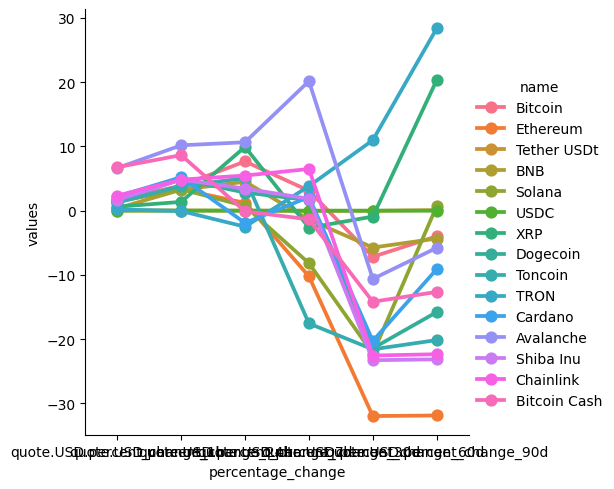

In [89]:
sns.catplot(x='percentage_change', y='values', hue='name', data=df5, kind='point')

In [90]:
df5['percentage_change'] = df5['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d'
                                                             , 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
                                                             ['1h', '24h', '7d', '30d', '60d', '90d'])
df5

name percentage_change    values
0        Bitcoin                1h   1.64560
1        Bitcoin               24h   3.89973
2        Bitcoin                7d   7.65939
3        Bitcoin               30d   3.09911
4        Bitcoin               60d  -7.18268
..           ...               ...       ...
85  Bitcoin Cash               24h   8.64614
86  Bitcoin Cash                7d  -0.12164
87  Bitcoin Cash               30d  -1.35332
88  Bitcoin Cash               60d -14.18395
89  Bitcoin Cash               90d -12.65689

[90 rows x 3 columns]

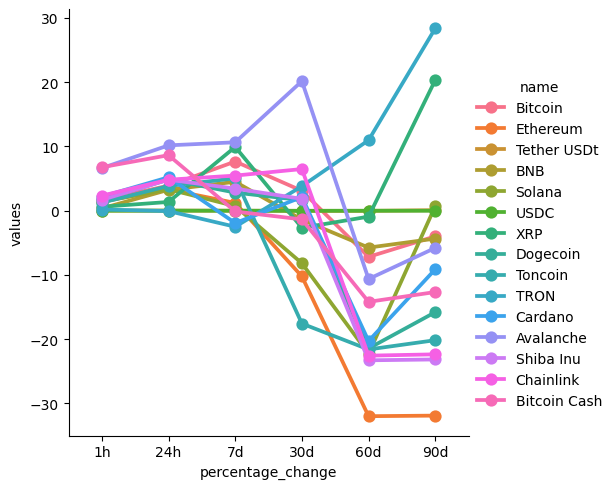

In [91]:
sns.catplot(x='percentage_change', y='values', hue='name', data=df5, kind='point')

In [92]:
df6 = df1[['name', 'quote.USD.price', 'timestamp']]
df6

name  quote.USD.price                   timestamp
0        Bitcoin      62250.23333  2024-09-18 19:42:20.436163
1       Ethereum       2391.40634  2024-09-18 19:42:20.436163
2    Tether USDt          1.00030  2024-09-18 19:42:20.436163
3            BNB        560.58675  2024-09-18 19:42:20.436163
4         Solana        134.69490  2024-09-18 19:42:20.436163
..           ...              ...                         ...
85       Cardano          0.34873  2024-09-18 19:42:47.117959
86     Avalanche         25.95854  2024-09-18 19:42:47.117959
87     Shiba Inu          0.00001  2024-09-18 19:42:47.117959
88     Chainlink         11.04333  2024-09-18 19:42:47.117959
89  Bitcoin Cash        338.77523  2024-09-18 19:42:47.117959

[90 rows x 3 columns]

In [105]:
df6.query("name == 'Bitcoin'" or "name == 'Ethereum'")

name  quote.USD.price                   timestamp
0   Bitcoin      62250.23333  2024-09-18 19:42:20.436163
15  Bitcoin      62250.23333  2024-09-18 19:42:25.640176
30  Bitcoin      62250.23333  2024-09-18 19:42:31.703009
45  Bitcoin      62250.23333  2024-09-18 19:42:36.832334
60  Bitcoin      62345.72523  2024-09-18 19:42:41.973779
75  Bitcoin      62345.72523  2024-09-18 19:42:47.117959